## Sales Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C:\\Users\\sharath\\Desktop\\analysis\\bm_train_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Few Observations:

1. The Item_Outlet_Sales has outliers.
2. The Item_Visibility has minimum value of 0.  The Item_Visibility can't be zero.  If the item has zero visibility, how can they sell the item?
3. Item_Weight and Item_outlet_size has missing values.

In [6]:
## First let us fix the item_visibility.
df.loc[df.Item_Visibility == 0.0, 'Item_Visibility'] = np.nan

Replaced zero values in item_visibility with np.nan.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            7997 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
## Selecting all object type columns
cat_cols = df.select_dtypes(include='object').columns.to_list()
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
## Exploring Object Type Columns
for col in cat_cols:
    print("Unique Value count : ", col, '\n')
    print('Count: ', len(df[col].unique()),'\n\n')
    

Unique Value count :  Item_Identifier 

Count:  1559 


Unique Value count :  Item_Fat_Content 

Count:  5 


Unique Value count :  Item_Type 

Count:  16 


Unique Value count :  Outlet_Identifier 

Count:  10 


Unique Value count :  Outlet_Size 

Count:  4 


Unique Value count :  Outlet_Location_Type 

Count:  3 


Unique Value count :  Outlet_Type 

Count:  4 




In [10]:
## Checking the value counts of Categorical Columns
## Exploring Object Type Columns
for col in cat_cols[1:]:
    print("Value count : ", col, '\n')
    print(df[col].value_counts(),'\n\n')

Value count :  Item_Fat_Content 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 


Value count :  Item_Type 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 


Value count :  Outlet_Identifier 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 


Value count :  Outlet_Size 

Medium    2793
Small     2388
High       932
Name: Outlet_Siz

Observations on Categorical Columns:

1. The Item_Fat_Content has miscoded values.  We need to fix them.
2. Item_Type has many categories.  It can be combined to fewer categories, like food items, drinks, non-veg items, etc.


In [11]:
df.loc[:, 'Item_Fat_Content'] = df.loc[:, 'Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

In [12]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
df.Item_Identifier.head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [14]:
df.loc[:, 'Item_Identifier'].apply(lambda x: x[:2]).value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [15]:
df.loc[df.Item_Identifier.str.startswith('NC'), 'Item_Fat_Content'] = 'Non Consumable'

In [16]:
df.Item_Fat_Content.value_counts()

Low Fat           3918
Regular           3006
Non Consumable    1599
Name: Item_Fat_Content, dtype: int64

Created a new category called 'Non Consumable' in Item_Fat_Content, and replaced all non-consumable items with this category.

In [17]:
## Creating a new column called Item_Category based on Item_Identifier
df['Item_Category'] = df.Item_Identifier.\
apply(lambda x: 'Non-Food' if (x[:2] == 'NC') else 'Drinks' if (x[:2] == 'DR') else 'Food')

In [18]:
df.Item_Category.value_counts()

Food        6125
Non-Food    1599
Drinks       799
Name: Item_Category, dtype: int64

In [19]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non Consumable,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Food


In [20]:
## Missing values
miss_values = df.isnull().sum()
print(type(miss_values))
miss_values[miss_values > 0]

<class 'pandas.core.series.Series'>


Item_Weight        1463
Item_Visibility     526
Outlet_Size        2410
dtype: int64

In [21]:
df.Item_Visibility.describe()

count    7997.000000
mean        0.070482
std         0.050308
min         0.003575
25%         0.031403
50%         0.057792
75%         0.098109
max         0.328391
Name: Item_Visibility, dtype: float64

In [22]:
## Getting the indexes of missing values form Outlet_size column
mv_idx = df[df.Item_Visibility.isnull()].index.to_list()
mv_idx[:5]

[3, 4, 5, 10, 32]

In [23]:
import datetime as dt

print(dt.datetime.today().year)

2023


In [24]:
df['Outlet_year'] = dt.datetime.today().year - df.Outlet_Establishment_Year

In [25]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,24
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food,25
4,NCD19,8.93,Non Consumable,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Food,36


In [26]:
## Let us remove the unwanted columns
df.drop(['Item_Identifier', 'Item_Type', 'Outlet_Establishment_Year'], axis=1,  inplace=True)

In [27]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_year
0,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,24
1,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,14
2,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,24
3,19.20,Regular,NaN,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,Food,25
4,8.93,Non Consumable,NaN,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non-Food,36


In [28]:
df.groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Size'])['Outlet_Size'].count()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [29]:
df.groupby('Outlet_Type')['Outlet_Size'].count()

Outlet_Type
Grocery Store         528
Supermarket Type1    3722
Supermarket Type2     928
Supermarket Type3     935
Name: Outlet_Size, dtype: int64

In [30]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Based on our analysis on Outlet_Size, we found out that all the missing outlet_size values are belongs to 'Small'.  So, let us fill the missing values with 'Small' outlet size.

In [31]:
df.loc[mv_idx, 'Outlet_Size'] = 'Small'

In [32]:
## Identifying the location and Outlet Types of missing Outlet Size rows.

df.loc[mv_idx,].groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Size'])['Outlet_Size'].count()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           30
                      Supermarket Type1  Small          114
Tier 2                Supermarket Type1  Small          169
Tier 3                Grocery Store      Small           29
                      Supermarket Type1  Small           59
                      Supermarket Type2  Small           65
                      Supermarket Type3  Small           60
Name: Outlet_Size, dtype: int64

### Working on Item_Weight missing values

In [33]:
# df.loc[mv_idx, :].groupby('Outlet_Size')['Item_Weight'].size()

In [34]:
# item_wt = df.groupby(['Item_Category','Outlet_Size'])['Item_Weight'].mean()
# item_wt


In [35]:
# item_wt[('Food','Small')]

In [36]:
# df.loc[mv_idx,['Item_Category','Outlet_Size','Item_Weight']].head()

In [37]:
# daahhhf.loc[mv_idx, 'Item_Weight'] = df.loc[mv_idx,['Item_Category','Outlet_Size']].apply(lambda x: item_wt[(x[0],x[1])], axis=1)

### Imputing Item_visibility with Iterative Imputer

In [38]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [39]:
imp = IterativeImputer(max_iter=20, verbose = 1, random_state=0)

In [40]:
num_df = df.select_dtypes(exclude='object')
num_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_year
0,9.30,0.016047,249.8092,3735.1380,24
1,5.92,0.019278,48.2692,443.4228,14
2,17.50,0.016760,141.6180,2097.2700,24
3,19.20,NaN,182.0950,732.3800,25
4,8.93,NaN,53.8614,994.7052,36


In [41]:
num_df.loc[mv_idx, 'Item_Visibility'].head()

3    NaN
4    NaN
5    NaN
10   NaN
32   NaN
Name: Item_Visibility, dtype: float64

In [42]:
num_df.loc[mv_idx, 'Item_Weight'].head()

3     19.200
4      8.930
5     10.395
10    11.800
32    18.700
Name: Item_Weight, dtype: float64

In [43]:
imp.fit(num_df)

[IterativeImputer] Completing matrix with shape (8523, 5)
[IterativeImputer] Change: 0.25807145235407436, scaled tolerance: 13.0869648 
[IterativeImputer] Early stopping criterion reached.


IterativeImputer(max_iter=20, random_state=0, verbose=1)

In [44]:
df1 = pd.DataFrame(imp.transform(num_df), columns = num_df.columns)

[IterativeImputer] Completing matrix with shape (8523, 5)


In [45]:
df1.loc[mv_idx,'Item_Weight'].head()

3     19.200
4      8.930
5     10.395
10    11.800
32    18.700
Name: Item_Weight, dtype: float64

In [46]:
df1.loc[mv_idx,'Item_Visibility'].head()

3     0.081449
4     0.076589
5     0.066691
10    0.065453
32    0.068098
Name: Item_Visibility, dtype: float64

In [47]:
df1.shape

(8523, 5)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           7060 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       7997 non-null   float64
 3   Item_MRP              8523 non-null   float64
 4   Outlet_Identifier     8523 non-null   object 
 5   Outlet_Size           6257 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Item_Category         8523 non-null   object 
 10  Outlet_year           8523 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


## Combining numerical and categorical data after imputing the missing values

In [49]:
df = pd.concat([df1, df.select_dtypes(include = 'object')], axis= 1)

In [50]:
df.shape

(8523, 11)

In [51]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_year,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category
0,9.30,0.016047,249.8092,3735.1380,24.0,Low Fat,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,5.92,0.019278,48.2692,443.4228,14.0,Regular,OUT018,Medium,Tier 3,Supermarket Type2,Drinks
2,17.50,0.016760,141.6180,2097.2700,24.0,Low Fat,OUT049,Medium,Tier 1,Supermarket Type1,Food
3,19.20,0.081449,182.0950,732.3800,25.0,Regular,OUT010,Small,Tier 3,Grocery Store,Food
4,8.93,0.076589,53.8614,994.7052,36.0,Non Consumable,OUT013,Small,Tier 3,Supermarket Type1,Non-Food


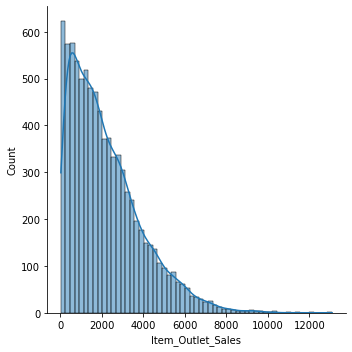

In [52]:
sns.displot(x='Item_Outlet_Sales', kde=True,data=df)
plt.show()

In [53]:
df['log_sales'] = np.log(df['Item_Outlet_Sales'])

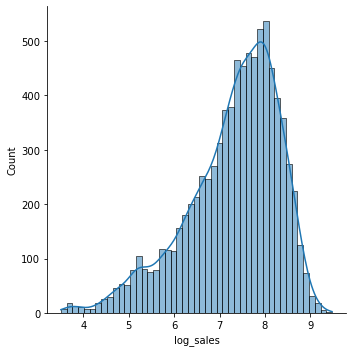

In [54]:
sns.displot(x='log_sales', kde=True,data=df)
plt.show()

In [55]:
df1 = pd.get_dummies(df, drop_first=True)
df1.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_year,log_sales,Item_Fat_Content_Non Consumable,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Food,Item_Category_Non-Food
0,9.30,0.016047,249.8092,3735.1380,24.0,8.225540,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,48.2692,443.4228,14.0,6.094524,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,141.6180,2097.2700,24.0,7.648392,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,19.20,0.081449,182.0950,732.3800,25.0,6.596300,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
4,8.93,0.076589,53.8614,994.7052,36.0,6.902446,1,0,1,0,...,0,0,1,0,1,1,0,0,0,1


## Building the base model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [57]:
X = df1.drop(['Item_Outlet_Sales', 'log_sales'], axis=1)
y = df1[['Item_Outlet_Sales', 'log_sales']]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y['log_sales'], test_size = .20, random_state = 1)

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
log_tr_pred = np.exp(lr.predict(X_train))
log_test_pred = np.exp(lr.predict(X_test))

In [62]:
log_tr_pred[:5]

array([2323.26310197, 2018.1601113 , 3705.49372834, 1125.39312084,
       1778.59437331])

In [63]:
act_y_train = y.loc[y_train.index, 'Item_Outlet_Sales']

In [64]:
print("Train R2 Score: ", round(r2_score(log_tr_pred, act_y_train)*100,2))

Train R2 Score:  32.14


In [65]:
X.shape

(8523, 24)

In [66]:
print("Train RMSE :", round(np.sqrt(mean_squared_error(log_tr_pred, act_y_train)),2))

Train RMSE : 1135.14


In [67]:
act_y_test = y.loc[y_test.index, 'Item_Outlet_Sales']

In [68]:
print("Test R2 Score: ", round(r2_score(log_test_pred, act_y_test)*100,2))
print("Test RMSE :", round(np.sqrt(mean_squared_error(log_test_pred, act_y_test)),2))


Test R2 Score:  31.07
Test RMSE : 1155.74


## Heat map to check the multicollinearity

In [69]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_year,Item_Fat_Content_Non Consumable,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Food,Item_Category_Non-Food
0,9.30,0.016047,249.8092,24.0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,48.2692,14.0,0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,141.6180,24.0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,19.20,0.081449,182.0950,25.0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,8.93,0.076589,53.8614,36.0,1,0,1,0,0,0,...,0,0,1,0,1,1,0,0,0,1


In [70]:
corr = X.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_year,Item_Fat_Content_Non Consumable,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Food,Item_Category_Non-Food
Item_Weight,1.000000,-0.019320,0.028657,0.008562,0.046853,-0.021046,0.012253,-0.002619,0.001239,-0.000456,...,0.004893,0.004807,-0.005664,-0.014794,0.010862,-0.002884,0.001239,0.000804,-0.007796,0.046853
Item_Visibility,-0.019320,1.000000,-0.006130,0.083081,-0.070081,0.049260,-0.041335,-0.036718,-0.034902,0.226497,...,-0.040764,-0.084734,0.062559,-0.077456,0.013040,-0.155324,-0.034902,-0.053935,0.067078,-0.070081
Item_MRP,0.028657,-0.006130,1.000000,-0.005020,0.004859,0.006063,0.002438,-0.008812,0.003850,-0.004976,...,-0.003906,-0.002963,0.005373,0.001951,-0.000744,0.004885,0.003850,-0.006714,0.029315,0.004859
Outlet_year,0.008562,0.083081,-0.005020,1.000000,0.004385,-0.003151,0.453388,-0.382361,-0.466336,0.393918,...,-0.048836,0.017181,0.049812,-0.540820,0.333895,-0.245070,-0.466336,0.538072,0.002312,0.004385
Item_Fat_Content_Non Consumable,0.046853,-0.070081,0.004859,0.004385,1.000000,-0.354722,0.004957,-0.001668,-0.001063,-0.000072,...,-0.010099,-0.006908,-0.000316,-0.005443,0.007695,-0.004614,-0.001063,-0.001361,-0.768023,1.000000
Item_Fat_Content_Regular,-0.021046,0.049260,0.006063,-0.003151,-0.354722,1.000000,-0.002132,0.004266,0.002129,-0.004300,...,0.004722,0.007299,-0.005037,-0.003272,0.000241,0.000533,0.002129,0.000183,0.423092,-0.354722
Outlet_Identifier_OUT013,0.012253,-0.041335,0.002438,0.453388,0.004957,-0.002132,1.000000,-0.122333,-0.122481,-0.090046,...,-0.122629,-0.233117,-0.195709,-0.244113,0.435419,0.254668,-0.122481,-0.122999,-0.003993,0.004957
Outlet_Identifier_OUT017,-0.002619,-0.036718,-0.008812,-0.382361,-0.001668,0.004266,-0.122333,1.000000,-0.122038,-0.089721,...,-0.122185,-0.232274,-0.196305,0.501132,-0.280954,0.253747,-0.122038,-0.122554,-0.000389,-0.001668
Outlet_Identifier_OUT018,0.001239,-0.034902,0.003850,-0.466336,-0.001063,0.002129,-0.122481,-0.122038,1.000000,-0.089829,...,-0.122333,0.472315,-0.190208,-0.243524,0.434369,-0.480943,1.000000,-0.122702,0.003433,-0.001063
Outlet_Identifier_OUT019,-0.000456,0.226497,-0.004976,0.393918,-0.000072,-0.004300,-0.090046,-0.089721,-0.089829,1.000000,...,-0.089938,-0.170971,0.370451,-0.179036,-0.206804,-0.353583,-0.089829,-0.090209,0.004932,-0.000072


In [71]:
np.triu(np.ones(X.corr().shape))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 

In [72]:
mask = np.triu(np.ones(X.corr().shape))

cor = X.corr()
cor = cor[(cor > .90) | (cor < -.90)]

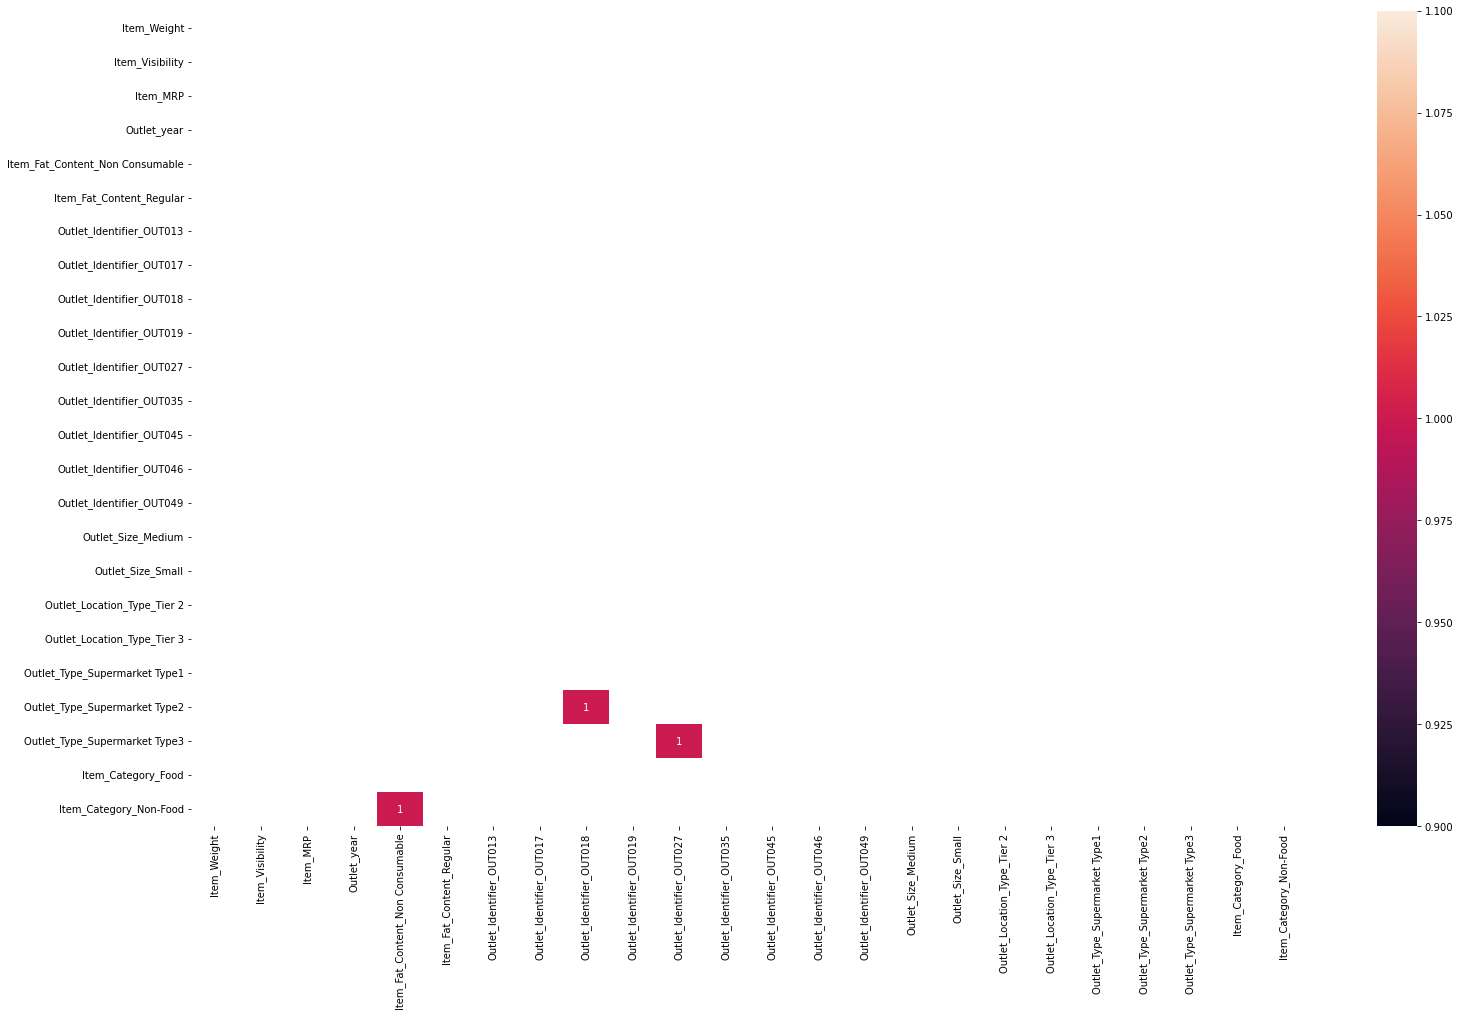

In [73]:
plt.figure(figsize=(25,15))
sns.heatmap(cor,  mask=mask, annot=True)
plt.show()

From the above heatmap, we can identify that some multicollinearity exists in the data.  Let us VIF to eliminate the multi-collinear columns.

### Variance Inflation Factor

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

C:\Users\sharath\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [75]:
vif_data

,feature,VIF
0,Item_Weight,1.005994
1,Item_Visibility,1.111865
2,Item_MRP,1.003805
3,Outlet_year,inf
4,Item_Fat_Content_Non Consumable,inf
5,Item_Fat_Content_Regular,1.222649
6,Outlet_Identifier_OUT013,inf
7,Outlet_Identifier_OUT017,inf
8,Outlet_Identifier_OUT018,inf
9,Outlet_Identifier_OUT019,inf


From the first iteration, we found out that Outlet_Size_Medium has highest VIF factor.  So, let us remove that column and re-run the VIF again.

In [76]:
X = X.drop('Outlet_Size_Medium', axis=1)
X.shape

(8523, 23)

In [77]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

C:\Users\sharath\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [78]:
vif_data

,feature,VIF
0,Item_Weight,1.005942
1,Item_Visibility,1.111803
2,Item_MRP,1.003805
3,Outlet_year,inf
4,Item_Fat_Content_Non Consumable,inf
5,Item_Fat_Content_Regular,1.222487
6,Outlet_Identifier_OUT013,inf
7,Outlet_Identifier_OUT017,inf
8,Outlet_Identifier_OUT018,inf
9,Outlet_Identifier_OUT019,inf


In [79]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_year,Item_Fat_Content_Non Consumable,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Food,Item_Category_Non-Food
0,9.30,0.016047,249.8092,24.0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,48.2692,14.0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,17.50,0.016760,141.6180,24.0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,19.20,0.081449,182.0950,25.0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,8.93,0.076589,53.8614,36.0,1,0,1,0,0,0,...,0,0,1,0,1,1,0,0,0,1


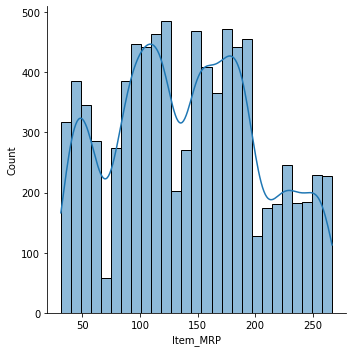

In [80]:
sns.displot(x='Item_MRP', data = X, kde=True)
plt.show()

In [81]:
## Let us scale the data before building the model
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

In [82]:
X_Scaled = scale.fit_transform(X)

In [83]:
X_Scaled_df = pd.DataFrame(X_Scaled, columns = X.columns)

In [84]:
X_Scaled_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_year,Item_Fat_Content_Non Consumable,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Food,Item_Category_Non-Food
0,0.282525,0.038399,0.927507,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.081274,0.048346,0.072068,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.770765,0.040593,0.468288,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.871986,0.239749,0.640093,0.458333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.260494,0.224786,0.095805,0.916667,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [85]:
X_Scaled_df.shape

(8523, 23)

### Building the model 

We are building the model now with non-multicollinearity scaled dataset.

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled_df, y['log_sales'], test_size=0.2, random_state=1)

In [87]:
lr.fit(X_train, y_train)

LinearRegression()

In [88]:
tr_scaled_pred = np.exp(lr.predict(X_train))
test_scaled_pred = np.exp(lr.predict(X_test))

In [89]:
act_y_train = y.loc[y_train.index, 'Item_Outlet_Sales']
act_y_test = y.loc[y_test.index, 'Item_Outlet_Sales']

In [90]:
print("Train Scaled R2 Score: ", round(r2_score(tr_scaled_pred, act_y_train)*100,2))
print("Train Scaled RMSE :", round(np.sqrt(mean_squared_error(tr_scaled_pred, act_y_train)),2))

Train Scaled R2 Score:  31.54
Train Scaled RMSE : 1135.01


In [91]:
print("Test Scaled R2 Score: ", round(r2_score(test_scaled_pred, act_y_test)*100,2))
print("Test Scaled RMSE :", round(np.sqrt(mean_squared_error(test_scaled_pred, act_y_test)),2))

Test Scaled R2 Score:  30.55
Test Scaled RMSE : 1155.23


## RF Model

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
rf = RandomForestRegressor(oob_score = True, min_samples_leaf = 25)

In [94]:
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=25, oob_score=True)

In [95]:
print("OOB_Score : ", rf.oob_score_)

OOB_Score :  0.7363646325054538


In [96]:
rf_tr_pred = np.exp(rf.predict(X_train))
rf_test_pred = np.exp(rf.predict(X_test))

In [97]:
print("Train RF R2 Score: ", round(r2_score(rf_tr_pred, act_y_train)*100,2))
print("Train RF RMSE :", round(np.sqrt(mean_squared_error(rf_tr_pred, act_y_train)),2))

Train RF R2 Score:  35.3
Train RF RMSE : 1005.19


In [98]:
print("Test RF R2 Score: ", round(r2_score(rf_test_pred, act_y_test)*100,2))
print("Test RF RMSE :", round(np.sqrt(mean_squared_error(rf_test_pred, act_y_test)),2))

Test RF R2 Score:  23.97
Test RF RMSE : 1099.87


In [99]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 25,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## RF model with non-scaled data

In [100]:
df1.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_year,log_sales,Item_Fat_Content_Non Consumable,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Food,Item_Category_Non-Food
0,9.30,0.016047,249.8092,3735.1380,24.0,8.225540,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,48.2692,443.4228,14.0,6.094524,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,141.6180,2097.2700,24.0,7.648392,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,19.20,0.081449,182.0950,732.3800,25.0,6.596300,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
4,8.93,0.076589,53.8614,994.7052,36.0,6.902446,1,0,1,0,...,0,0,1,0,1,1,0,0,0,1


In [101]:
X = df1.drop(['Item_Outlet_Sales','log_sales'], axis=1)
y = df1['Item_Outlet_Sales']

In [102]:
rf1 = RandomForestRegressor(min_samples_leaf=20)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [104]:
rf1.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=20)

In [105]:
rf1_tr_pred = rf1.predict(X_train)
rf1_test_pred = rf1.predict(X_test)

In [106]:
print("Train RF R2 Score: ", round(r2_score(rf1_tr_pred, y_train)*100,2))
print("Train RF RMSE :", round(np.sqrt(mean_squared_error(rf1_tr_pred, y_train)),2))

Train RF R2 Score:  51.22
Train RF RMSE : 948.65


In [107]:
print("Test RF R2 Score: ", round(r2_score(rf1_test_pred, y_test)*100,2))
print("Test RF RMSE :", round(np.sqrt(mean_squared_error(rf1_test_pred, y_test)),2))

Test RF R2 Score:  40.63
Test RF RMSE : 1058.91


In [108]:
rf1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Feature Importance

In [109]:
dict(zip(X.columns, rf1.feature_importances_))

{'Item_Weight': 0.06552993695799304,
 'Item_Visibility': 0.02631866058536351,
 'Item_MRP': 0.4956263305618067,
 'Outlet_year': 0.04225497992134463,
 'Item_Fat_Content_Non Consumable': 0.0005682996582158131,
 'Item_Fat_Content_Regular': 0.0017830269983020715,
 'Outlet_Identifier_OUT013': 0.00011747576235319412,
 'Outlet_Identifier_OUT017': 0.0004521202219131539,
 'Outlet_Identifier_OUT018': 0.028120325685587026,
 'Outlet_Identifier_OUT019': 0.006305509550183255,
 'Outlet_Identifier_OUT027': 0.08400989706192648,
 'Outlet_Identifier_OUT035': 0.0005257635429470482,
 'Outlet_Identifier_OUT045': 0.0013449539760162096,
 'Outlet_Identifier_OUT046': 0.0006789370279820547,
 'Outlet_Identifier_OUT049': 0.0002152831929937764,
 'Outlet_Size_Medium': 0.0005874379000307382,
 'Outlet_Size_Small': 0.0020754520772842877,
 'Outlet_Location_Type_Tier 2': 0.0005487929058572224,
 'Outlet_Location_Type_Tier 3': 6.645734895818589e-05,
 'Outlet_Type_Supermarket Type1': 0.13573840581515448,
 'Outlet_Type_Superm

In [110]:
df_fea_imp = pd.Series(dict(zip(X.columns, rf1.feature_importances_))).sort_values(ascending=False)
df_fea_imp = df_fea_imp[df_fea_imp > .01]

In [111]:
df_fea_imp

Item_MRP                         0.495626
Outlet_Type_Supermarket Type1    0.135738
Outlet_Identifier_OUT027         0.084010
Outlet_Type_Supermarket Type3    0.076497
Item_Weight                      0.065530
Outlet_year                      0.042255
Outlet_Type_Supermarket Type2    0.029190
Outlet_Identifier_OUT018         0.028120
Item_Visibility                  0.026319
dtype: float64

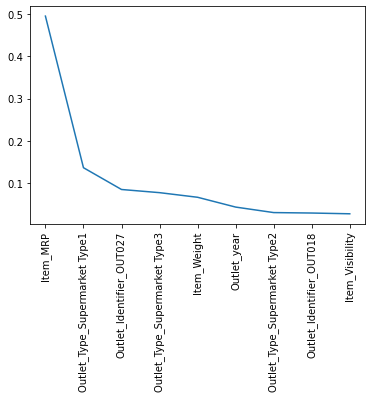

In [112]:
plt.plot(df_fea_imp)
plt.xticks(rotation=90)
plt.show()

In [113]:
df1.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_year,log_sales,Item_Fat_Content_Non Consumable,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Food,Item_Category_Non-Food
0,9.30,0.016047,249.8092,3735.1380,24.0,8.225540,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,48.2692,443.4228,14.0,6.094524,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,141.6180,2097.2700,24.0,7.648392,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,19.20,0.081449,182.0950,732.3800,25.0,6.596300,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
4,8.93,0.076589,53.8614,994.7052,36.0,6.902446,1,0,1,0,...,0,0,1,0,1,1,0,0,0,1


In [114]:
df.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [115]:
## Selecting only the importance columns based on feature importance

df1_subset = df1.loc[:, df_fea_imp.index]

In [116]:
df1_subset.head()

,Item_MRP,Outlet_Type_Supermarket Type1,Outlet_Identifier_OUT027,Outlet_Type_Supermarket Type3,Item_Weight,Outlet_year,Outlet_Type_Supermarket Type2,Outlet_Identifier_OUT018,Item_Visibility
0,249.8092,1,0,0,9.30,24.0,0,0,0.016047
1,48.2692,0,0,0,5.92,14.0,1,1,0.019278
2,141.6180,1,0,0,17.50,24.0,0,0,0.016760
3,182.0950,0,0,0,19.20,25.0,0,0,0.081449
4,53.8614,1,0,0,8.93,36.0,0,0,0.076589


In [117]:
df1_subset.shape

(8523, 9)

In [118]:
X1 = df1_subset
y1= df['Item_Outlet_Sales']

In [119]:
X1.shape

(8523, 9)

In [120]:
y1.shape

(8523,)

In [121]:
rf1 = RandomForestRegressor(min_samples_leaf=20)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 123)

In [123]:
rf1.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=20)

In [124]:
rf1_tr_pred = rf1.predict(X_train)
rf1_test_pred = rf1.predict(X_test)

In [125]:
print("Train RF R2 Score: ", round(r2_score(rf1_tr_pred, y_train)*100,2))
print("Train RF RMSE :", round(np.sqrt(mean_squared_error(rf1_tr_pred, y_train)),2))

Train RF R2 Score:  50.31
Train RF RMSE : 960.79


In [126]:
print("Test RF R2 Score: ", round(r2_score(rf1_test_pred, y_test)*100,2))
print("Test RF RMSE :", round(np.sqrt(mean_squared_error(rf1_test_pred, y_test)),2))

Test RF R2 Score:  43.2
Test RF RMSE : 1037.29
